# <center>Data Mining And Analysis(CBD 3335_2)</center>

## <center>Assignment 2</center>

<center>
    
            Shruti Vihol (C0892585) 
    
            Kinjal Jha (C0892751) 
    
            Avishek Jha (C0895175) 
    
            Francis Neal Altares (C0894540)
     
            Nguyen Quoc Phuc Nguyen (C0891756) 
    
</center>


#### Context
-  A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
* The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.


* Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products. 

#### Data Description 

Dataset has 537577 rows (transactions) and 12 columns (features) as described below:

* User_ID: Unique ID of the user. There are a total of 5891 users in the dataset.
* Product_ID: Unique ID of the product. There are a total of 3623 products in the dataset.
* Gender: indicates the gender of the person making the transaction.
* Age: indicates the age group of the person making the transaction.
* Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.
* City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.
* Stay_In_Current_City_Years: Indicates how long the users has lived in this city.
* Marital_Status: is 0 if the user is not married and 1 otherwise.
* Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.
* Purchase: Purchase amount.







![](https://bestblackfridaydeal.net/wp-content/uploads/2018/08/blackfriday-predictions-2018.jpg)

#### Project Stages In The Notebook

<span style="color:PURPLE">
    
1. **Glance at the Datasets(train, test)** 
2. **Data Analysis** 
3. **Data Wrangling** 
4. **Data Visualization**
5. **Data Modelling**
6. **Model Evaluation and Conclusion**
</span>.

### IMPORTING LIBRARIES

In [2]:
#Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot


#Library to ignore warnigs
import warnings
warnings.filterwarnings("ignore")


#default theme
plt.style.use('ggplot')
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
plt.rcParams['figure.figsize'] =[8,8]
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.dpi']=80

### 1) First Glance at the datasets

##### Dataset train

In [3]:
data=pd.read_csv('train.csv')

In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
data.shape

(550068, 12)

##### Dataset test

In [6]:
test=pd.read_csv("test.csv")

In [7]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [8]:
#Shape of train and test
print('There are {} rows and {} columns in train'.format(data.shape[0],data.shape[1]))
print('There are {} rows and {} columns in test'.format(test.shape[0],test.shape[1]))

There are 550068 rows and 12 columns in train
There are 233599 rows and 11 columns in test


In [9]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
470060,1000413,P00002542,M,26-35,11,C,0,0,8,14.0,NaN,8013
395974,1000984,P00003442,M,51-55,16,A,2,1,4,5.0,8.0,2769
14234,1002106,P00119542,F,18-25,20,A,3,1,8,14.0,NaN,5952
72183,1005091,P00177642,M,26-35,17,B,1,1,8,NaN,NaN,9914
272536,1006001,P00209742,F,26-35,7,A,0,1,1,11.0,15.0,15472
16702,1002590,P00330342,M,18-25,4,A,0,0,5,11.0,16.0,6943
452591,1003704,P00289342,F,36-45,0,C,4+,1,5,8.0,14.0,5215
183076,1004250,P00320042,F,51-55,0,C,4+,1,1,8.0,NaN,11734
385861,1005390,P00182142,M,0-17,0,C,1,0,1,5.0,6.0,15551
215795,1003356,P00119142,M,36-45,7,C,2,1,3,4.0,12.0,13406


## 2) Data Analysis

In [18]:
# All existing columns
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


##### missing values train

In [21]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

##### missing values percentage(train)

In [22]:
def missing(data):
    missing_values=data.isnull().sum()
    missing_percentage=missing_values*100/len(data['User_ID'])
    missing_percentage=missing_percentage.sort_values(ascending=False)
    return missing_percentage

In [23]:
missing(data)

Product_Category_3            69.672659
Product_Category_2            31.566643
User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Purchase                       0.000000
dtype: float64

##### missing values test

In [24]:
test.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [25]:
missing(test)

Product_Category_3            69.590195
Product_Category_2            30.969311
User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
dtype: float64

##### Duplicated values train

In [26]:
data.duplicated().sum()

0

##### Duplicated values test

In [27]:
test.duplicated().sum()

0

<div class="alert alert-block alert-warning">
    <b>Observations:</b>
    <ul>
        <li>There are 550068 rows and 12 columns in train.</li>
        <li>There are 233599 rows and 11 columns in test.</li>
        <li>We notice product_category_2 and product_category_3 have 173638 and 383247 values respectively in the train dataset.</li>
        <li>We notice product_category_2 and product_category_3 have 72344 and 383247 values respectively in the test dataset.</li>
        <li>We also notice that percentage of missing values of product_Category_3 is 69.672659% and for Product_Category_2 is 31.566643% in train.</li>
        <li>We also notice that percentage of missing values of Product_Category_3 is 69.672659% and for Product_Category_2 is 31.566643%in test.</li>
        <li>There are no duplicated values in either of the datasets.</li>
    </ul>
</div>


### 2) Data Wrangling
      

In [28]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [29]:
#checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


##### Unique identifiers such as 'User_Id do not provide any meaningful information, hence we are dropping it. 

##### 1) Datatype information

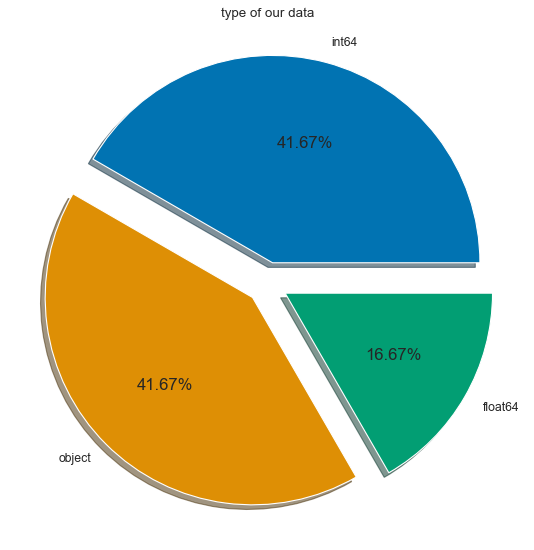

In [154]:
#making a pie chart
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('type of our data');

In [30]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### 2) Dropping User_ID  column

In [156]:
#dropping user id col
df.drop(['User_ID'],axis=1,inplace=True)

In [157]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


<span style="color:Green">As we see now User_Id and Purchase are dropped from the dataset.</span>.

<ul>
    

#### 3) Unique values and its percentage

In [158]:
pd.set_option('display.max_rows', None)  # Displaying all rows
pd.set_option('display.max_columns', None)  # Displaying all columns

# Getting total count of unique values for each column
unique_counts = data.nunique().sort_values(ascending=False)

# Getting percent of unique values relevant to all data
unique_percent = (data.nunique() / data.shape[0]).sort_values(ascending=False)

# Combining the results into a DataFrame
unique_data = pd.concat([unique_counts, unique_percent], axis=1, keys=['Total Unique', 'Percent Unique'])

# Displaying the unique data summary table
print(unique_data)


                            Total Unique  Percent Unique
Purchase                           18105        0.032914
User_ID                             5891        0.010710
Product_ID                          3631        0.006601
Occupation                            21        0.000038
Product_Category_1                    20        0.000036
Product_Category_2                    17        0.000031
Product_Category_3                    15        0.000027
Age                                    7        0.000013
Stay_In_Current_City_Years             5        0.000009
City_Category                          3        0.000005
Gender                                 2        0.000004
Marital_Status                         2        0.000004


##### 4) Handling categorical columns

##### lets explore Age,Stay_In_Current_City_Years  ,City_Category ,Gender and martial status column

In [160]:
#Unique cities
unique_city_categories = df['City_Category'].unique()
print("Unique City Categories:", unique_city_categories)


Unique City Categories: ['A' 'C' 'B']


In [161]:
#stay in current city unique
current_city = df['Stay_In_Current_City_Years'].unique()
print("Stay_In_Current_City_Years:", current_city)


Stay_In_Current_City_Years: ['2' '4+' '3' '1' '0']


In [162]:
#age uniwue values
Age = df['Age'].unique()
print("Ages:", Age)

Ages: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


In [163]:
#gender unique values
gender=df['Gender'].unique()
print("Gender",gender)

Gender ['F' 'M']


In [164]:
#martial status unique values
Martial_status=df['Marital_Status'].unique()
print("Marital_Status",Martial_status)

Marital_Status [0 1]


<div class="alert alert-block alert-success">
<b>CONCLUSIONS from Categorical columns  </b> 
 
- Unique_city has only 3 different cities A, B, C so we will encode them.
- Similary We will bucketize 'Stay_In_Current_city_years'in three categories, New resident(0-1 years),intermediate resident(3-4) and long term resident(4+). Later we will encode these three values as well using ine hot encoding.
- converting gender( M,F) into numerical value,similar with Age

</div>

In [165]:
# Bucketizing the 'Stay_In_Current_City_Years' column
# Adjust bins based on the unique values in 'Stay_In_Current_City_Years'
bins = [0, 1,3, 4]
labels = ['New Resident', 'Intermediate Resident', 'Long-Term Resident']
df['Residency_Status'] = pd.cut(df['Stay_In_Current_City_Years'].replace('4+', 4).astype(int), bins=bins, labels=labels)


In [166]:
df.drop('Stay_In_Current_City_Years',axis=1,inplace=True)

In [167]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Residency_Status
0,P00069042,F,0-17,10,A,0,3,NaN,NaN,8370,Intermediate Resident
1,P00248942,F,0-17,10,A,0,1,6.0,14.0,15200,Intermediate Resident


###### We see that Age is a range of values in our datset hence  in order to preserve the continuous nature of the age information and provide the regression model with a more interpretable representation of the feature, we will convert the age ranges into numerical values(their mean).

In [168]:
#mapping age to its midpoints
def map_age_to_midpoint(df, age_column):
    age_mapping = {
        '0-17': 8.5,
        '18-25': 21.5,
        '26-35': 30.5,
        '36-45': 40.5,
        '46-50': 48.5,
        '51-55': 53.5,
        '55+': 60.0
    }
    
    df['Age_Numerical'] = df[age_column].replace(age_mapping)
    return df
df = map_age_to_midpoint(df, 'Age')

In [169]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Residency_Status,Age_Numerical
0,P00069042,F,0-17,10,A,0,3,NaN,NaN,8370,Intermediate Resident,8.5
1,P00248942,F,0-17,10,A,0,1,6.0,14.0,15200,Intermediate Resident,8.5
2,P00087842,F,0-17,10,A,0,12,NaN,NaN,1422,Intermediate Resident,8.5
3,P00085442,F,0-17,10,A,0,12,14.0,NaN,1057,Intermediate Resident,8.5
4,P00285442,M,55+,16,C,0,8,NaN,NaN,7969,Long-Term Resident,60.0


###### Using one hot encoding

In [170]:
#handling categorical variables
categorical_columns = ['Gender', 'City_Category','Residency_Status']

# Performing one-hot encoding for all categorical columns
df = pd.get_dummies(df, columns=categorical_columns)

In [171]:
df.head()

,Product_ID,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Numerical,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Residency_Status_New Resident,Residency_Status_Intermediate Resident,Residency_Status_Long-Term Resident
0,P00069042,0-17,10,0,3,NaN,NaN,8370,8.5,1,0,1,0,0,0,1,0
1,P00248942,0-17,10,0,1,6.0,14.0,15200,8.5,1,0,1,0,0,0,1,0
2,P00087842,0-17,10,0,12,NaN,NaN,1422,8.5,1,0,1,0,0,0,1,0
3,P00085442,0-17,10,0,12,14.0,NaN,1057,8.5,1,0,1,0,0,0,1,0
4,P00285442,55+,16,0,8,NaN,NaN,7969,60.0,0,1,0,0,1,0,0,1


In [172]:
df.drop('Age',axis=1,inplace=True)

In [173]:
df.head()

,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Numerical,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Residency_Status_New Resident,Residency_Status_Intermediate Resident,Residency_Status_Long-Term Resident
0,P00069042,10,0,3,NaN,NaN,8370,8.5,1,0,1,0,0,0,1,0
1,P00248942,10,0,1,6.0,14.0,15200,8.5,1,0,1,0,0,0,1,0
2,P00087842,10,0,12,NaN,NaN,1422,8.5,1,0,1,0,0,0,1,0
3,P00085442,10,0,12,14.0,NaN,1057,8.5,1,0,1,0,0,0,1,0
4,P00285442,16,0,8,NaN,NaN,7969,60.0,0,1,0,0,1,0,0,1


##### 5) Handling missing values

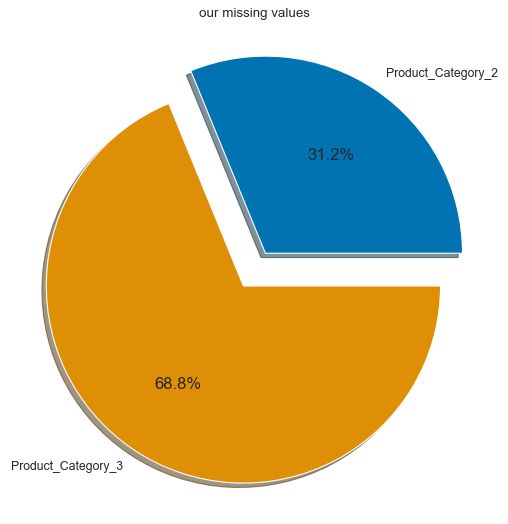

In [42]:
#pie chart for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('our missing values');

In [36]:
missing_category_2 = df['Product_Category_2'].isnull()
missing_category_3 = df['Product_Category_3'].isnull()

non_missing_values_1 = df.loc[~df['Product_Category_1'].isnull(), 'Product_Category_1']

# Randomly impute missing values from category 1 to categories 2 and 3
df.loc[missing_category_2, 'Product_Category_2'] = np.random.choice(non_missing_values_1, size=missing_category_2.sum())
df.loc[missing_category_3, 'Product_Category_3'] = np.random.choice(non_missing_values_1, size=missing_category_3.sum())


In [37]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,11.0,8.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,16.0,1.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,2.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,5.0,2.0,7969


In [38]:
df.shape

(550068, 12)

In [39]:
print('Number of missing values = ',df.isnull().sum().max())

Number of missing values =  0


<div class="alert alert-block alert-success">
<b>Conclusions after Cleaning  </b> 
 
- We chceked the datatypes of all columns.
- Later we handled all the categorical column into numerical columns using one hot encoding.
- For age column, we imputed midpoint of the age ranges.
- For currrent_sity_of_stay , we bucketize the inputs in three different bins label them as new_resident, intermediate_resident and longterm resident.
- Later we encode the residency status as well using one hot encoding.
-  We then handled all the missing values as well by imputing he mean of the product_category_2,product_category_3

</div>

## 4) Data Visualization

KeyError: 'Age_Numerical'

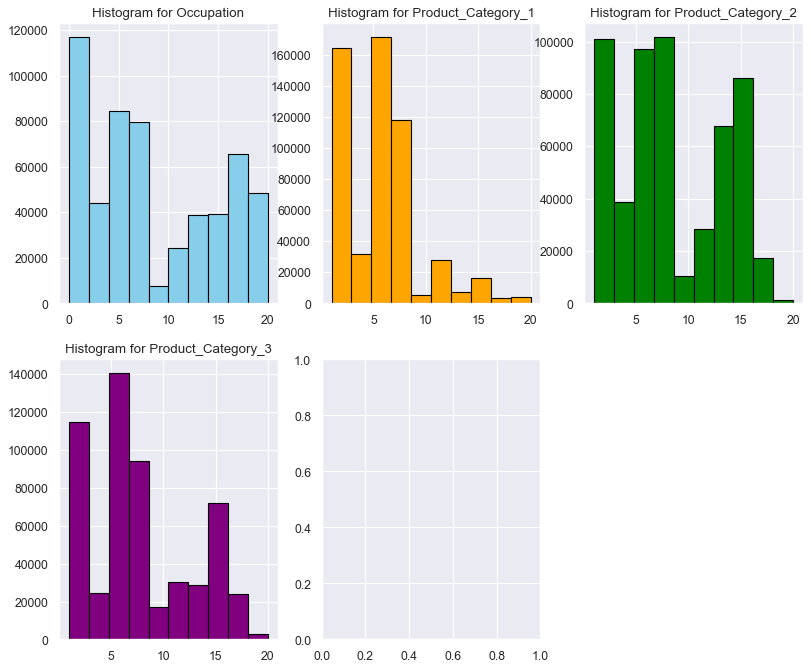

In [40]:
#visualizing histograms of selected features
selected_features = ['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Age_Numerical']
colors = ['skyblue', 'orange', 'green', 'purple', 'pink']

plt.figure(figsize=(12, 10))

for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i+1)
    df[feature].hist(edgecolor='black', color=colors[i])
    plt.title(f'Histogram for {feature}')

plt.suptitle('Histograms for Selected Features', y=1.02)
plt.tight_layout()
plt.show()


#### A) Gender gap

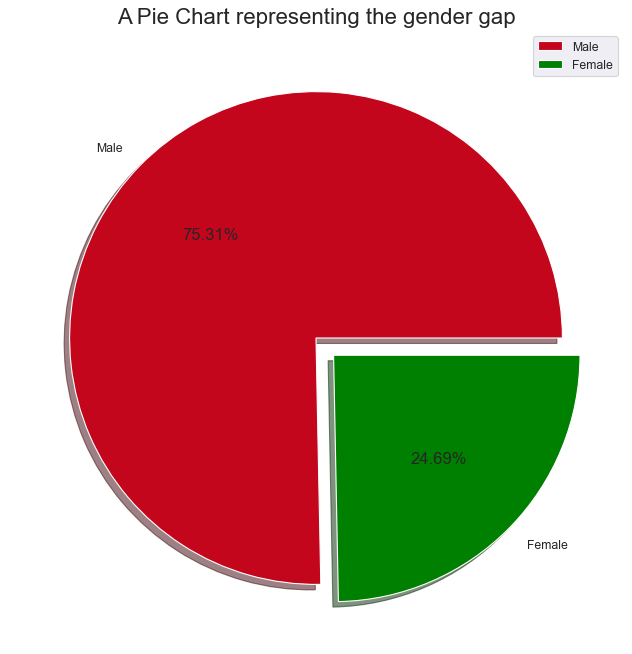

In [48]:
# Counting the occurrences of each gender
gender_counts = df['Gender_M'].value_counts()

# Creating a pie chart
labels = ['Male', 'Female']
colors = ['#C4061D', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(gender_counts, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

##### We notice that males arre far higher in number in the dataset as that of feamles

#### B) Age

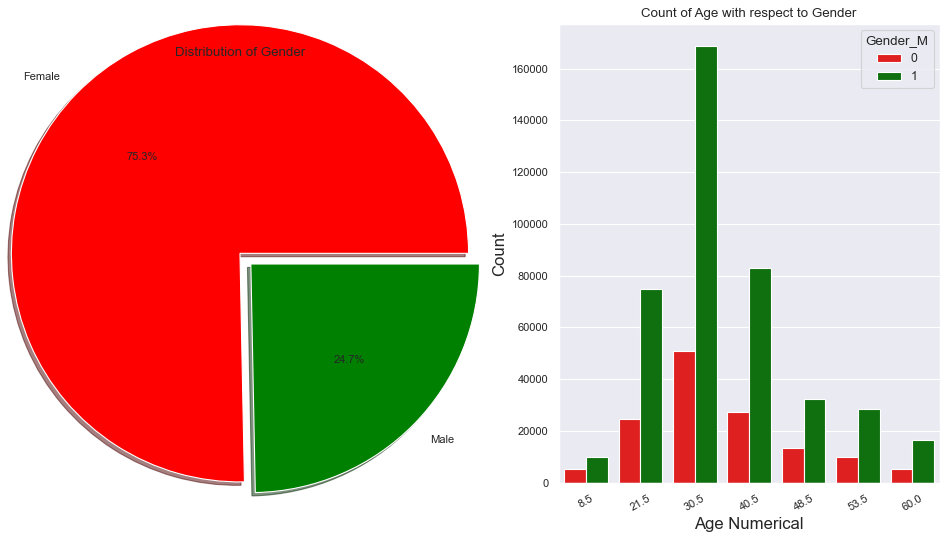

In [49]:
plt.figure(figsize=(12, 7))

# Pie chart for Gender distribution
plt.subplot(1, 2, 1)
explode = (0, 0.1)  # Explode the 'Male' slice
colors_pie = ['red', 'green']
df['Gender_M'].value_counts().plot.pie(shadow=True, autopct='%1.1f%%', radius=1.5, textprops={'fontsize': 10}, labels=['Female', 'Male'], explode=explode, colors=colors_pie)
plt.title('Distribution of Gender', fontsize=12)

# Count plot for Age with respect to Gender
plt.subplot(1, 2, 2)
colors_bar = ['red', 'green']
sns.countplot(x='Age_Numerical', hue='Gender_M', data=df, palette=colors_bar)
plt.title('Count of Age with respect to Gender', fontsize=12)
plt.xlabel('Age Numerical')
plt.ylabel('Count')
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()


* Gender : 75.3% is male Vs 24.7% female
* Age    : Maximum buyers(39.9%) belong to age 30.5 and minimum (2.7%) belong to 8.5 age group 

#### C) Occupation of Customers

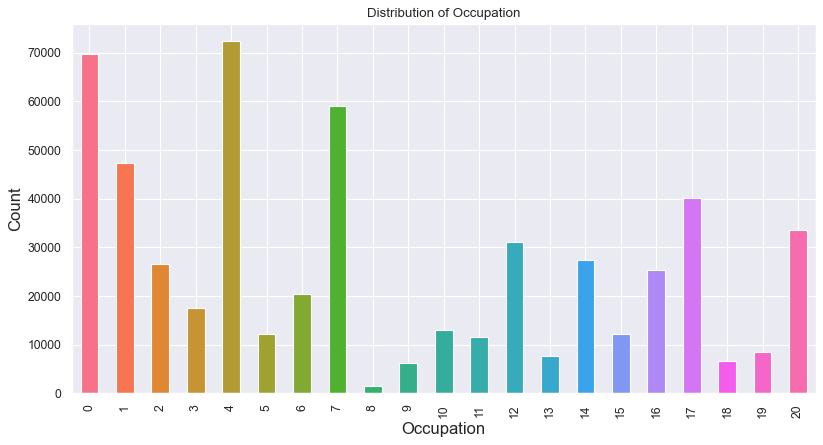

In [50]:
custom_colors = sns.color_palette("husl", len(df['Occupation'].unique()))

# Plot the distribution of Occupation with custom colors
plt.figure(figsize=(12, 6))
df['Occupation'].value_counts().sort_index().plot(kind='bar', color=custom_colors)
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()


We notice that 4 is highest common occupation among cutsomers followed closley by 0 and 7

#### d) City_category

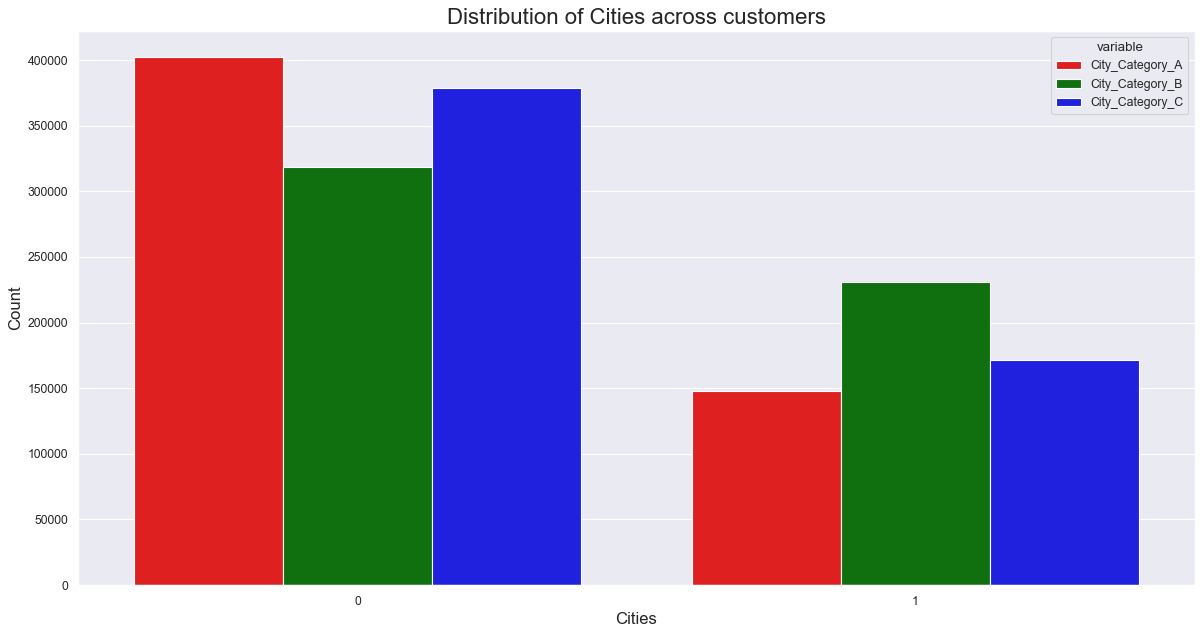

In [51]:
# Defining a color palette
palette = ['red', 'green', 'blue']

# Creating the countplot
plt.rcParams['figure.figsize'] = (18, 9)
sns.countplot(data=df[['City_Category_A', 'City_Category_B', 'City_Category_C']].melt(), x='value', hue='variable', palette=palette)
plt.title('Distribution of Cities across customers', fontsize=20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()


#### e) Products

Here we explore the products themselves. This is important, as we do not have labeled items in this dataset. Theoretically, a customer could be spending $5,000 on 4 new TVs, or 10,000 pens. This difference matters for stores, as their profits are affected. Since we do not know what the items are, let's explore the categories of the items.

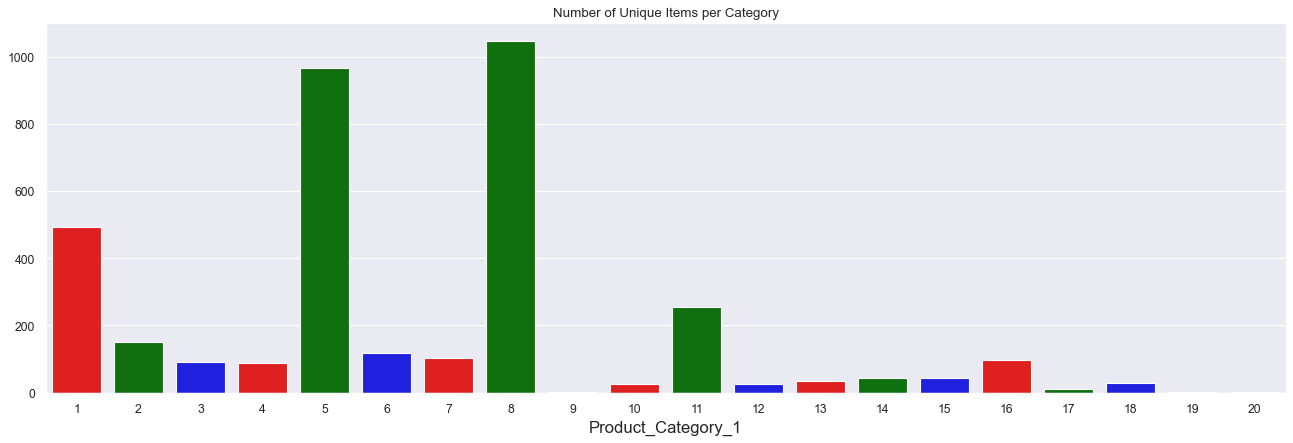

In [52]:
#making a barplot for product category 1
plt.figure(figsize=(20,6))
prod_by_cat = df.groupby('Product_Category_1')['Product_ID'].nunique()

sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values, palette=palette)
plt.title('Number of Unique Items per Category')
plt.show()

Category labels 1, 5, and 8 clearly have the most items within them. This could mean the store is known for that item, or that the category is a broad one.

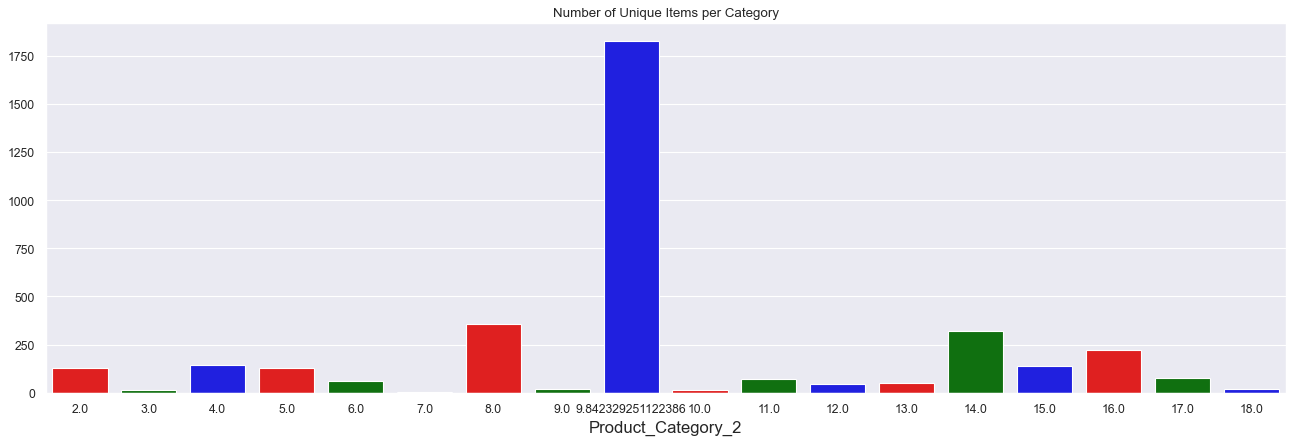

In [53]:
#barplot for product category 2
plt.figure(figsize=(20,6))
prod_by_cat = df.groupby('Product_Category_2')['Product_ID'].nunique()

sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values, palette=palette)
plt.title('Number of Unique Items per Category')
plt.show()

we notice that 9.54 product is highest selling in product category 2

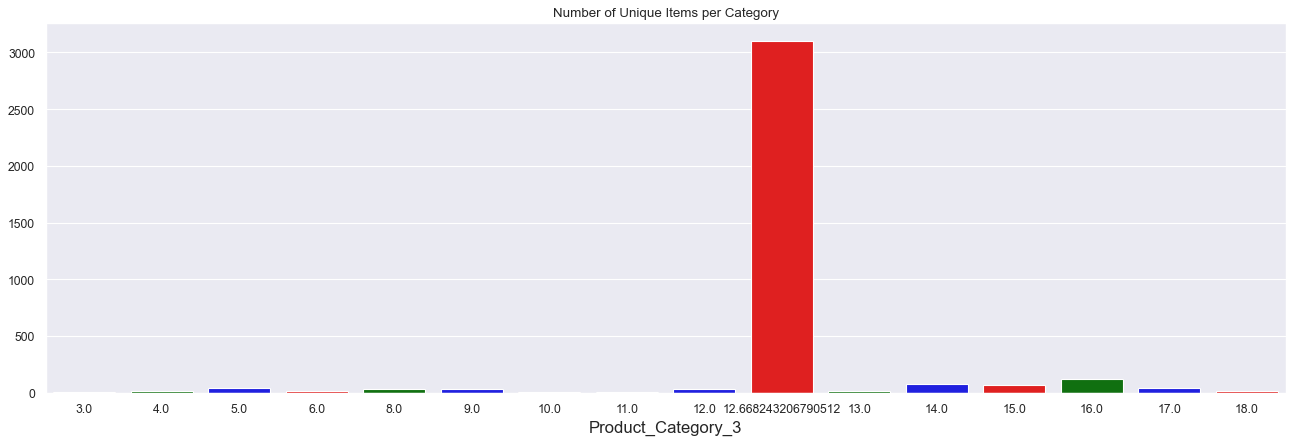

In [54]:
plt.figure(figsize=(20,6))
prod_by_cat = df.groupby('Product_Category_3')['Product_ID'].nunique()

sns.barplot(x=prod_by_cat.index,y=prod_by_cat.values, palette=palette)
plt.title('Number of Unique Items per Category')
plt.show()

For product category 3

#### f) Martial Status

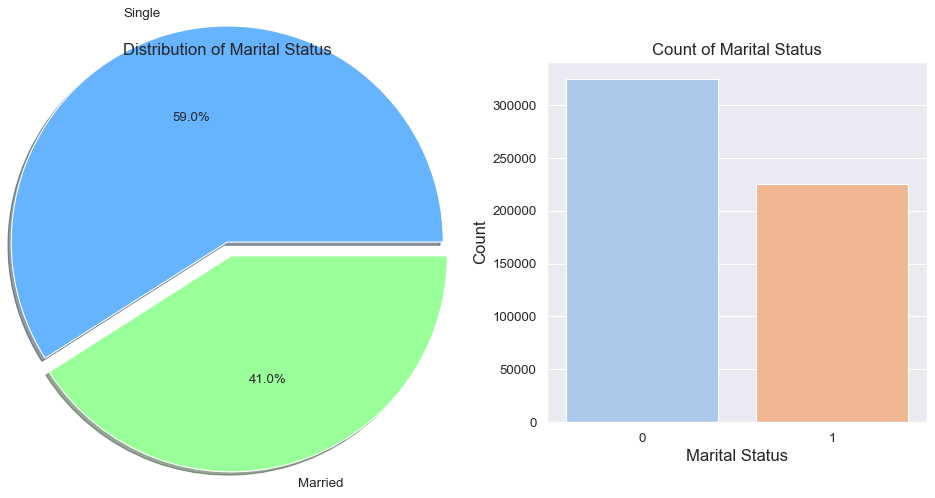

In [55]:
plt.figure(figsize=(12, 6))

# Pie chart for Marital Status distribution
plt.subplot(1, 2, 1)
explode = (0, 0.1)  # Explode the 'Married' slice
colors = ['#66b3ff', '#99ff99']
df['Marital_Status'].value_counts().plot.pie(shadow=True, autopct='%1.1f%%', radius=1.5, textprops={'fontsize': 12}, labels=['Single', 'Married'], explode=explode, colors=colors)
plt.title('Distribution of Marital Status', fontsize=15)

# Count plot for Marital Status
plt.subplot(1, 2, 2)
sns.countplot(x='Marital_Status', data=df, palette='pastel')
plt.title('Count of Marital Status', fontsize=15)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


Our dataset contains 59% single vs 41% married people

#### g) City Categories

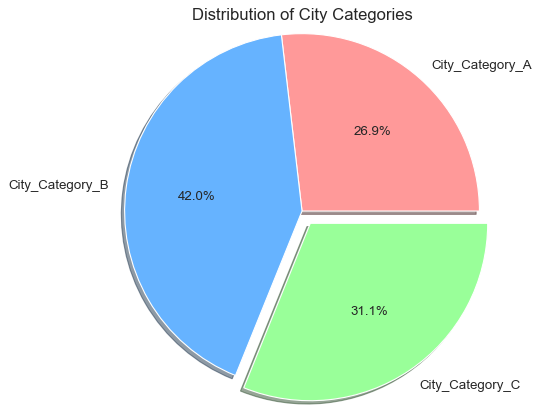

In [56]:
import matplotlib.pyplot as plt

# Pie chart for City Category distribution
plt.figure(figsize=(10, 6))
explode = (0, 0, 0.1)  # Explode the 'City_Category_C' slice
colors = ['#ff9999', '#66b3ff', '#99ff99']
city_counts = df[['City_Category_A', 'City_Category_B', 'City_Category_C']].sum()
city_counts.plot.pie(shadow=True, autopct='%1.1f%%', radius=1.2, textprops={'fontsize': 12}, labels=city_counts.index, explode=explode, colors=colors)
plt.title('Distribution of City Categories', fontsize=15)

plt.show()


We notice that most of poeple live in city category b (42%) followed by C and then A

#### h) Distribution of residency status

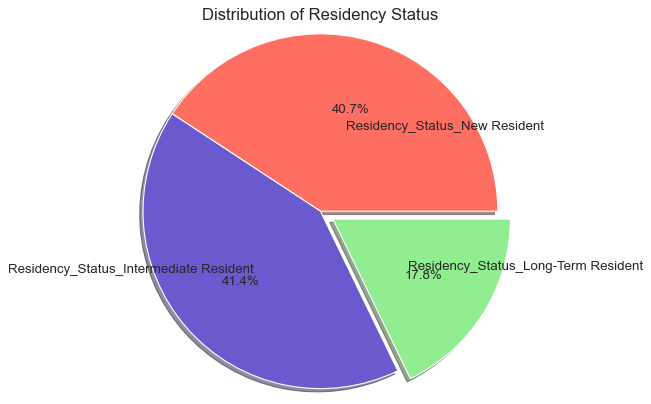

In [57]:
import matplotlib.pyplot as plt

# Pie chart 
plt.figure(figsize=(10, 6))
explode = (0, 0, 0.1)  
bright_colors = ['#FF6F61', '#6A5ACD', '#90EE90']  # Bright colors

# Calculate counts for each Residency Status
residency_counts = df[['Residency_Status_New Resident', 'Residency_Status_Intermediate Resident', 'Residency_Status_Long-Term Resident']].sum()

# Plot the pie chart
residency_counts.plot.pie(shadow=True, autopct='%1.1f%%', radius=1.2, textprops={'fontsize': 12}, labels=residency_counts.index, explode=explode, colors=bright_colors,labeldistance=0.5)

plt.title('Distribution of Residency Status', fontsize=15)
plt.show()


<div class="alert alert-block alert-success">
<b>Conclusions after few visuals  </b> 
    
- Marital_status : 59% Not married Vs 41% married
    
- City_Category  : Maximum buyers belong to City_Category=B (42.1%) and min to City_Category=A (26.8%)
    
- Stay_In_Current_City_Years : Maximum buyers are Intermediate resident (41%) followed by new resident and least are long term residents.


</div>

#### I) Occupation

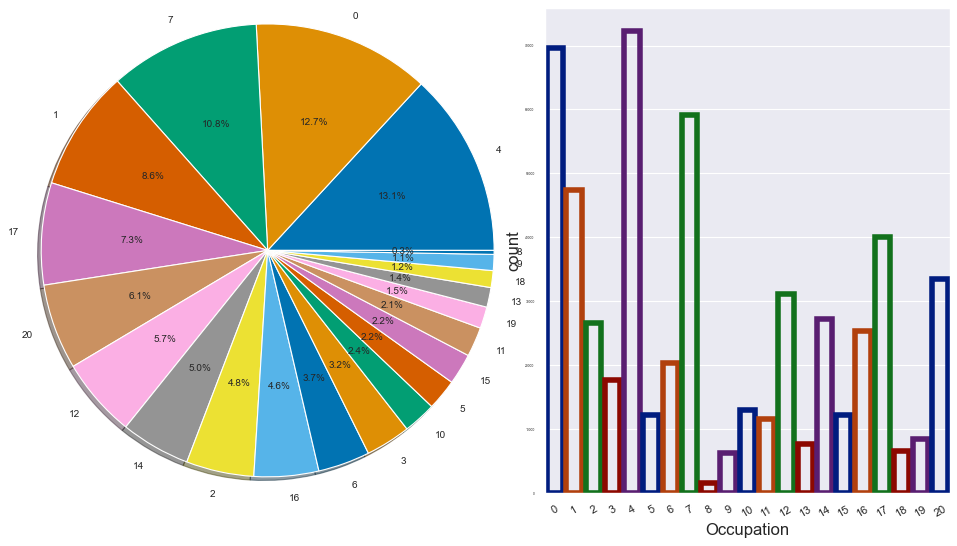

In [58]:
#Exploring categorical variable - Occupation
cat_col_3 = ['Occupation',]
count = 1
for cols in cat_col_3:
    plt.subplot(1, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.4,textprops={'fontsize': 9} )
    count +=1
    plt.subplot(1, 2, count)
    plt.tight_layout()
    #df.Occupation.value_counts().sort_values().plot(kind = 'bar')
    sns.countplot(x="Occupation", data=df,facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 5))
    fig=plt.gcf()
    fig.set_size_inches(12,7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=3)
    plt.xticks(rotation=30)
    count+=1

Occupation : Maximum buyers belong to Occupation category = 4 and minimum buyers belong to category = 8

#### j) Product category 1

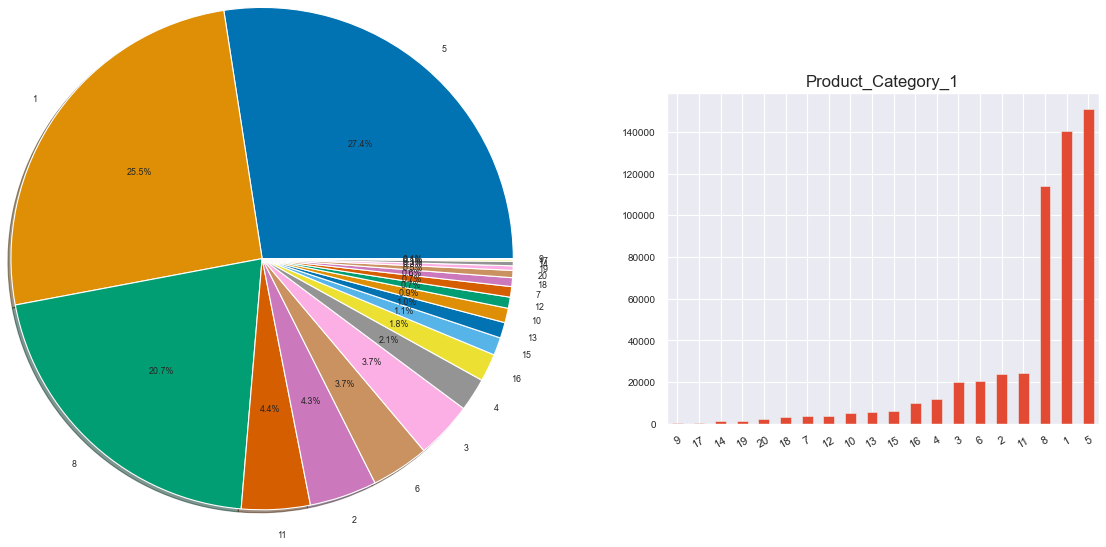

In [59]:
#Explore categorical variable - Product_Category_1
cat_col_4 = ['Product_Category_1',]
count = 1
for cols in cat_col_4:
    plt.subplot(1, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.9,textprops={'fontsize': 8} )
    count +=1
    plt.subplot(1, 2, count)
    plt.tight_layout()
    plt.style.use('ggplot')
    df.Product_Category_1.value_counts().sort_values().plot(kind = 'bar')
    fig=plt.gcf()
    plt.title("Product_Category_1", fontsize=15) 
    fig.set_size_inches(15,7)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=9)
    plt.xticks(rotation=30)
    count+=1

#### Product category 2

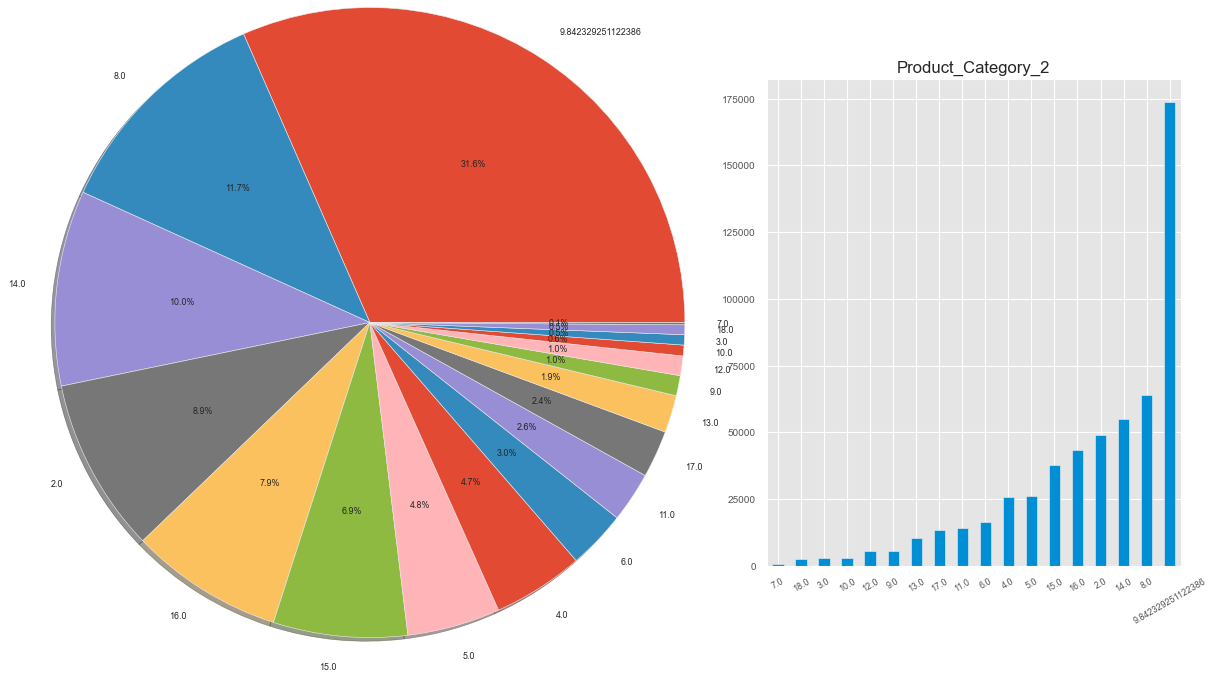

In [60]:
#Explore categorical variable - Product_Category_2
cat_col_5 = ['Product_Category_2',]
count = 1
for cols in cat_col_5:
    plt.subplot(1, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.9,textprops={'fontsize': 8} )
    count +=1
    plt.subplot(1, 2, count)
    plt.tight_layout()
    plt.style.use('fivethirtyeight')
    df.Product_Category_2.value_counts().sort_values().plot(kind = 'bar')
    fig=plt.gcf()
    plt.title("Product_Category_2", fontsize=15) 
    fig.set_size_inches(15,10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=9)
    plt.xticks(rotation=30)
    count+=1

For Product_Category_2 : eight is highest and 7.0 is lowest

#### Product cateogry 3

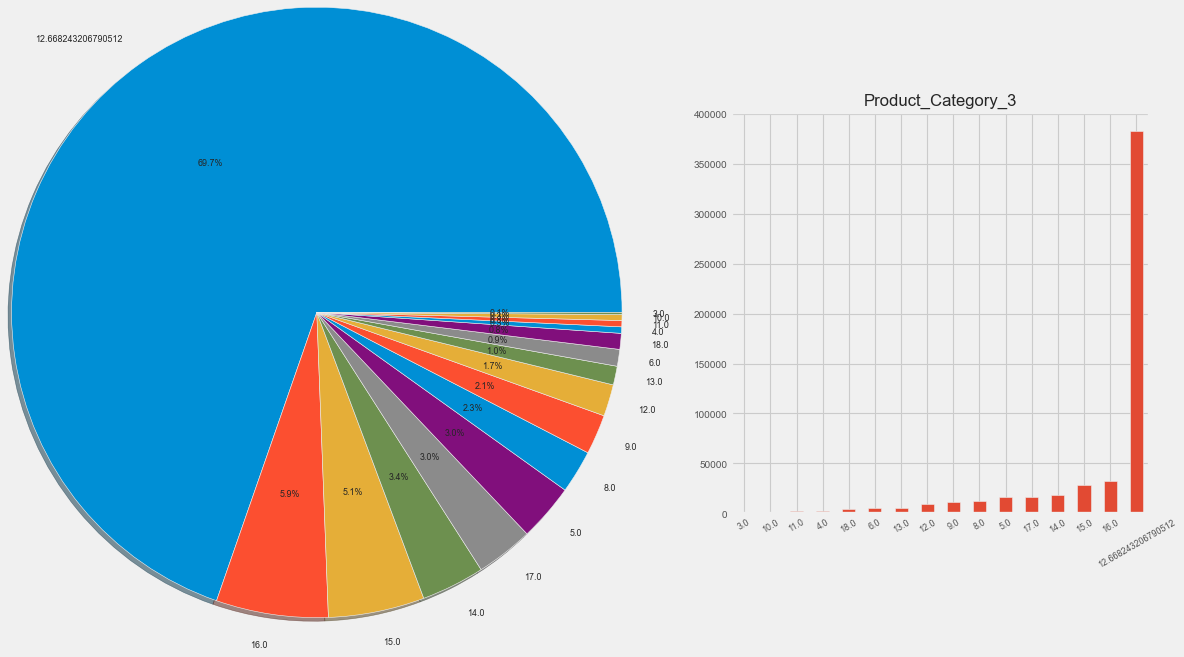

In [61]:
#Explore categorical variable - Product_Category_3
cat_col_6 = ['Product_Category_3',]
count = 1
for cols in cat_col_6:
    plt.subplot(1, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.9,textprops={'fontsize': 8} )
    count +=1
    plt.subplot(1, 2, count)
    plt.tight_layout()
    plt.style.use('ggplot')
    df.Product_Category_3.value_counts().sort_values().plot(kind = 'bar')
    fig=plt.gcf()
    plt.title("Product_Category_3", fontsize=15) 
    fig.set_size_inches(15,10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=9)
    plt.xticks(rotation=30)
    count+=1

#### Product ID

In [62]:
#variables - Product_ID 
#Lets emove P and convert product id to a integer
df['Product_ID'] = df['Product_ID'].apply(lambda x: x.replace('P', '')
                                if isinstance(x, str) else x).astype(int)

df['Product_ID'] = df['Product_ID'].astype('int')

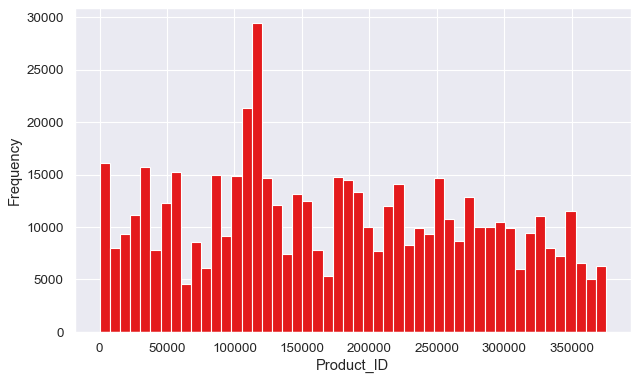

In [63]:
# Lets see how Product_ID analysis looks like
sns.set(style='darkgrid', palette="Set1", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['Product_ID'], norm_hist=False, kde=False, bins=50, hist_kws={"alpha": 1}
).set(xlabel='Product_ID', ylabel='Frequency');

Maximum frequency of product id can be seen from 110000 to 120000

#### Catplot for age vs purchase

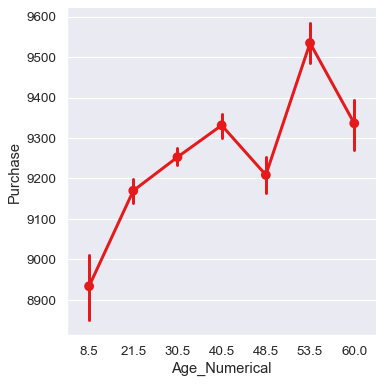

In [64]:
#Variable - Age Vs Purchase
#Catplot Age+Purchase
sns.catplot(x='Age_Numerical',y='Purchase',kind='point',data=df)

* Age group 51-55 is the highest purchase group with value 9520+ as median
* Age group 0-17 is the lowest purchase group with value 8920+ as median as they are non-adults and need to depend upon parents for buying 

#### Catplot of age vs purchase with hue as gender

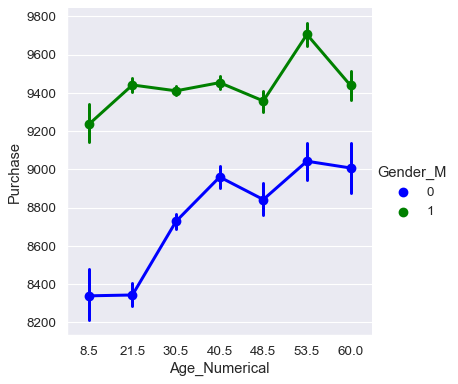

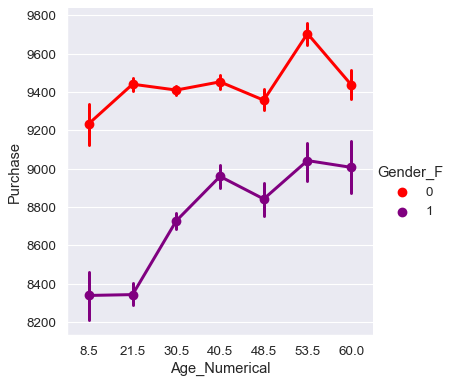

In [65]:
# Variable - Age Vs Purchase with hue = Gender
# Catplot Age+Purchase
sns.catplot(x='Age_Numerical', y='Purchase', kind='point', data=df, hue='Gender_M', palette=['blue', 'green'])
sns.catplot(x='Age_Numerical', y='Purchase', kind='point', data=df, hue='Gender_F', palette=['red', 'purple'])

plt.show()


* Male have higher buying than female across all age categories
* 53.5 age group is highest in bothh Genders

#### Catplot Age+Purchase+City_Category+Gender

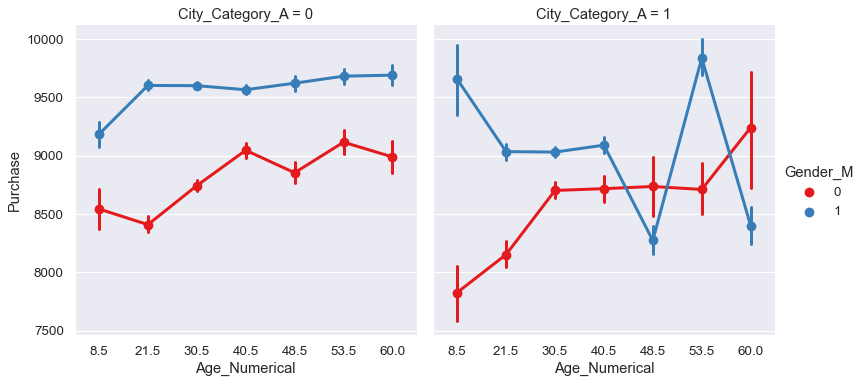

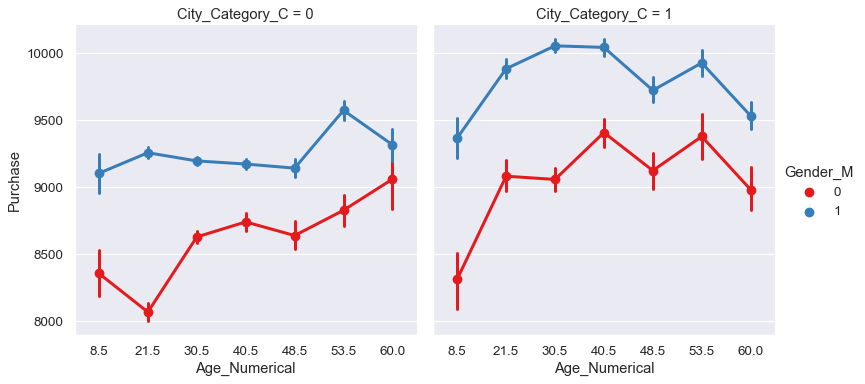

In [66]:
#Catplot Age+Purchase+City_Category+Gender
sns.catplot(x='Age_Numerical',y='Purchase',kind='point',data=df,col='City_Category_A',hue='Gender_M')
sns.catplot(x='Age_Numerical',y='Purchase',kind='point',data=df,col='City_Category_C',hue='Gender_M')

* In City category B & C : Probabiity of purchases is more for male Gender Vs Female
* For City category A : For age group 45-50 & 55+, female buyers are more than male buyers, for other age groups male are more than female
* In City category B : Probabiity of purchases is more for age group 0-17 than 18-25, 26-35, 36-45 & 46-50 which is interesting

Irrespective of stay in current city, male purchasing is more than female

#### #Catplot Marital_Status+Purchase

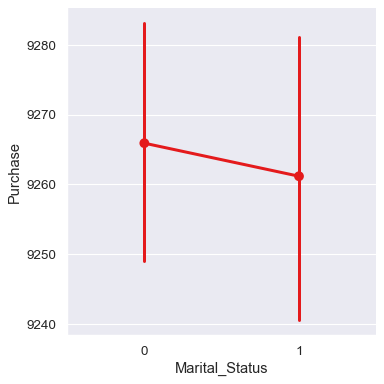

In [67]:
#Catplot Marital_Status+Purchase
sns.catplot(x='Marital_Status',y='Purchase',kind='point',data=df)

Unmarried people buy more than married people 

#### #Catplot Age+Purchase+Marital_Status

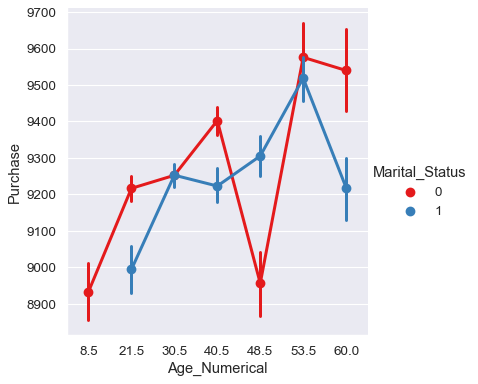

In [68]:
#Catplot Age+Purchase+Marital_Status
sns.catplot(x='Age_Numerical',y='Purchase',kind='point',data=df,hue='Marital_Status')

* age group 46-50 and married spent more than non-married
* In all other age groups , unmarried people spent more than married

#### # Boxplot of Age Vs Purchase in ascending order of purchase

<Axes: xlabel='Age_Numerical', ylabel='Purchase'>

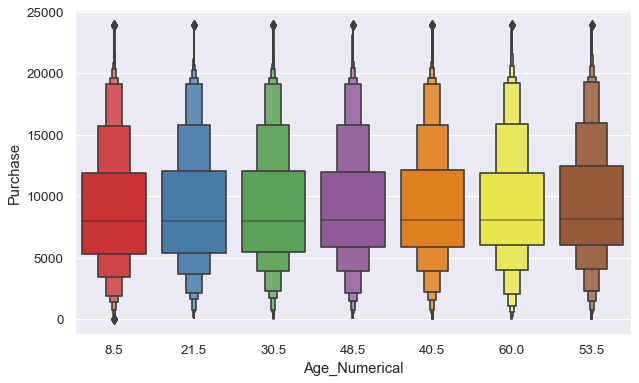

In [69]:
# Boxplot of Age Vs Purchase in ascending order of purchase
sorted_nb = df.groupby(['Age_Numerical'])['Purchase'].median().sort_values()
sns.boxenplot(x=df['Age_Numerical'], y=df['Purchase'], order=list(sorted_nb.index))

we can see again that 48.5 is having highest mean of the Purchase amount and is the highest spender

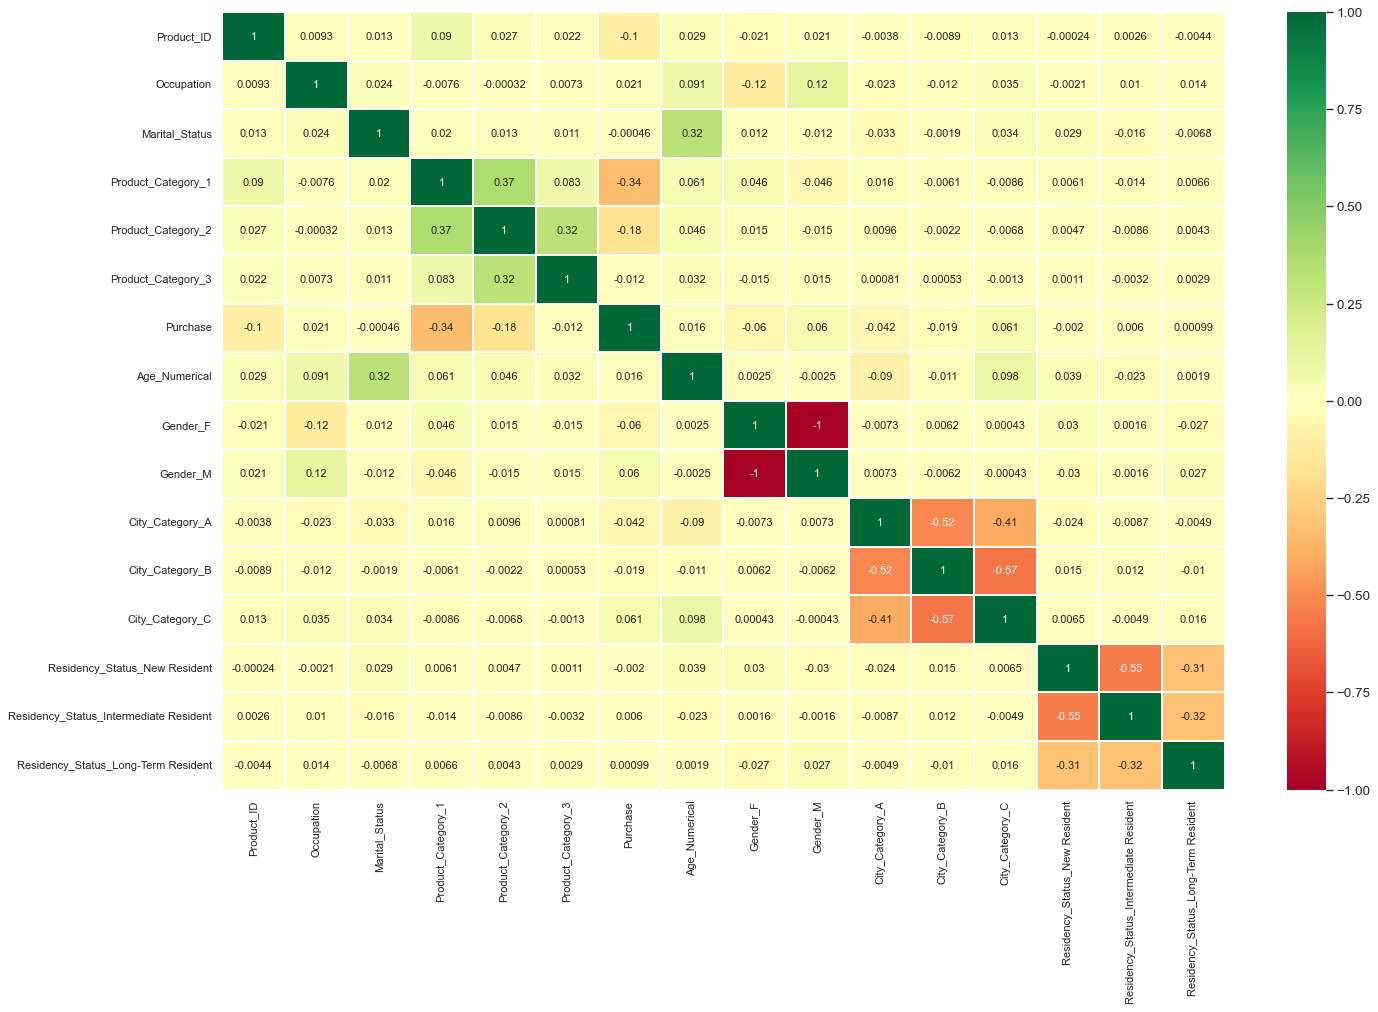

In [70]:

#Lets do a correlation plot for entire dataframe
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(18,12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

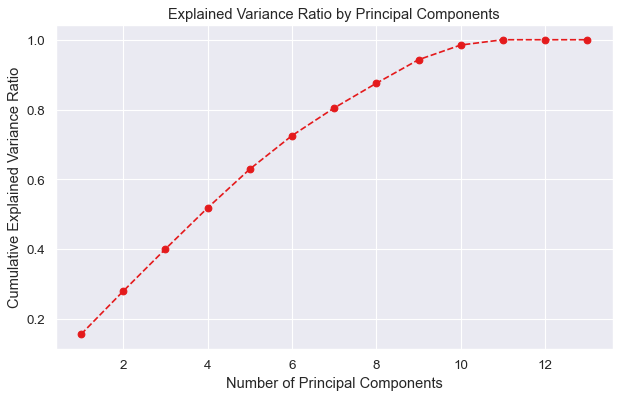

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Selecting only numerical features for PCA
numerical_features = ['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Age_Numerical', 'Gender_F', 'Gender_M', 'City_Category_A', 'City_Category_B', 'City_Category_C', 'Residency_Status_New Resident', 'Residency_Status_Intermediate Resident', 'Residency_Status_Long-Term Resident']

# Extracting numerical features
X = df[numerical_features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the explained variance ratio
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()


## Data Wrangling on test dataset

In [72]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [73]:
test.drop(['User_ID'],axis=1,inplace=True)

In [75]:
# Bucketizing the 'Stay_In_Current_City_Years' column
# Adjust bins based on the unique values in 'Stay_In_Current_City_Years'
bins = [0, 1,3, 4]
labels = ['New Resident', 'Intermediate Resident', 'Long-Term Resident']
test['Residency_Status'] = pd.cut(test['Stay_In_Current_City_Years'].replace('4+', 4).astype(int), bins=bins, labels=labels)


In [76]:
def map_age_to_midpoint(test, age_column):
    age_mapping = {
        '0-17': 8.5,
        '18-25': 21.5,
        '26-35': 30.5,
        '36-45': 40.5,
        '46-50': 48.5,
        '51-55': 53.5,
        '55+': 60.0
    }
    
    test['Age_Numerical'] = test[age_column].replace(age_mapping)
    return test
test = map_age_to_midpoint(test, 'Age')

In [78]:
categorical_columns = ['Gender', 'City_Category','Residency_Status']

# Performing one-hot encoding for all categorical columns
test = pd.get_dummies(test, columns=categorical_columns)

In [79]:
#variables - Product_ID 
#Lets emove P and convert product id to a integer
test['Product_ID'] = test['Product_ID'].apply(lambda x: x.replace('P', '')
                                if isinstance(x, str) else x).astype(int)

test['Product_ID'] = test['Product_ID'].astype('int')

In [80]:
missing_category_2 = test['Product_Category_2'].isnull()
missing_category_3 = test['Product_Category_3'].isnull()

non_missing_values_1 = df.loc[~test['Product_Category_1'].isnull(), 'Product_Category_1']

# Randomly impute missing values from category 1 to categories 2 and 3
test.loc[missing_category_2, 'Product_Category_2'] = np.random.choice(non_missing_values_1, size=missing_category_2.sum())
test.loc[missing_category_3, 'Product_Category_3'] = np.random.choice(non_missing_values_1, size=missing_category_3.sum())


In [82]:
test.drop(['Age','Stay_In_Current_City_Years'],axis=1,inplace=True)

In [84]:
test.shape

(233599, 15)

### We have cleaned the test data as well, as we see the shape of both test and df(train) is same.

## Data Modelling

### Linear Regression

In [85]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [86]:
x=df.drop('Purchase',axis=1)
y=df.Purchase

In [87]:
print(x.shape)
print(y.shape)

(550068, 15)
(550068,)


In [88]:
x.head()

,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age_Numerical,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Residency_Status_New Resident,Residency_Status_Intermediate Resident,Residency_Status_Long-Term Resident
0,69042,10,0,3,9.842329,12.668243,8.5,1,0,1,0,0,0,1,0
1,248942,10,0,1,6.000000,14.000000,8.5,1,0,1,0,0,0,1,0
2,87842,10,0,12,9.842329,12.668243,8.5,1,0,1,0,0,0,1,0
3,85442,10,0,12,14.000000,12.668243,8.5,1,0,1,0,0,0,1,0
4,285442,16,0,8,9.842329,12.668243,60.0,0,1,0,0,1,0,0,1


In [89]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [90]:
x_train.shape

(412551, 15)

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [92]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train, y_train)
print(lm.fit(x_train, y_train))

LinearRegression()


In [93]:
predictions = lm.predict(x_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)

Predicted purchases (in dollars) for new costumers: [ 9395.78804602  4669.05292575 10926.28804602 ... 10199.05292575
 11267.05292575  9903.05292575]


In [94]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))

MAE: 3579.0182095500973
MSE: 21828645.429050967


### We can see model is performing poorly

### XG Boost Regressor

In [95]:
eg = XGBRegressor(n_estimators=3600, learning_rate=0.05)

# Train the model using the training set
reg.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_val, y_val)], verbose=0)

# Predict on the validation set
y_val_pred = reg.predict(X_val)

# Model Evaluation
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = reg.score(X_val, y_val)

print(f'RMSE on Validation Set: {rmse_val}')
print(f'R-squared on Validation Set: {r2_val}')

(412551, 15)

In [96]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor



# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize XGBoost regressor
reg = XGBRegressor(n_estimators=3600, learning_rate=0.05)

# Train the model using the training sets
reg.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=0)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=3600, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [97]:
x_train.head()

,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age_Numerical,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Residency_Status_New Resident,Residency_Status_Intermediate Resident,Residency_Status_Long-Term Resident
178247,233842,7,1,1,15.000000,12.668243,53.5,0,1,0,1,0,0,1,0
196647,139942,12,0,5,9.842329,12.668243,21.5,0,1,0,0,1,0,0,1
418590,290242,5,0,8,14.000000,17.000000,30.5,0,1,0,1,0,1,0,0
408727,274942,4,0,8,9.842329,12.668243,21.5,0,1,0,1,0,0,1,0
216416,49442,4,0,1,8.000000,12.668243,21.5,0,1,0,1,0,1,0,0


In [98]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 15 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Product_ID                              233599 non-null  int32  
 1   Occupation                              233599 non-null  int64  
 2   Marital_Status                          233599 non-null  int64  
 3   Product_Category_1                      233599 non-null  int64  
 4   Product_Category_2                      233599 non-null  float64
 5   Product_Category_3                      233599 non-null  float64
 6   Age_Numerical                           233599 non-null  float64
 7   Gender_F                                233599 non-null  uint8  
 8   Gender_M                                233599 non-null  uint8  
 9   City_Category_A                         233599 non-null  uint8  
 10  City_Category_B                         2335

In [99]:
#Predicting Test data with the model
y_test_pred = reg.predict(x_test)

In [100]:
y_test_pred.shape

(110014,)

In [101]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
RMSE_xgb=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

R^2: 0.7229890458172519
Adjusted R^2: 0.7229512709094104
MAE: 1957.9223857255015
MSE: 6960227.081510293
RMSE: 2638.2242288157186


In [102]:
y_test.shape

(110014,)

In [103]:
y_test_pred.shape

(110014,)

### Random Forest

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


RMSE: 2903.290930710831
R-squared: 0.6645292580557493


### Gradient boosting

In [105]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Results:")
print(f"MSE: {mse_gb}")
print(f"R-squared: {r2_gb}")




Gradient Boosting Results:
MSE: 8604474.617550416
R-squared: 0.6575494310551034


### KNN algortihm

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("K-Nearest Neighbors (KNN) Results:")
print(f"MSE: {mse_knn}")
print(f"R-squared: {r2_knn}")

K-Nearest Neighbors (KNN) Results:
MSE: 13749407.302062647
R-squared: 0.4527856071952808


### Model evaluations and comparisons

In [108]:
# Initialize models
linear_reg = LinearRegression()
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.05)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
knn_reg = KNeighborsRegressor(n_neighbors=5)
gradient_boosting = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

models = [linear_reg, xgb_reg, random_forest, knn_reg, gradient_boosting]
model_names = ['Linear Regression', 'XGBoost Regressor', 'Random Forest', 'KNN Regressor', 'Gradient Boosting']

results = []

# Train and evaluate each model
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MSE': mse,
        'R-squared': r2
    })

# Create a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


KeyboardInterrupt: 

### Hyper Parameter tuning for XGBoost Regressor

In [122]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    
}

# Initialize XGBoost Regressor
xgb_reg = XGBRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_xgb_reg = grid_search.best_estimator_

# Print the best parameters
print("Best Hyperparameters:", best_params)

# Predict using the best estimator
y_pred = best_xgb_reg.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Final Model Evaluation:")
print("MSE:", mse)
print("R-squared:", r2)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   3.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   3.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   3.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   3.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   3.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   6.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   6.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   5.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   6.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   5.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   9.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

KeyboardInterrupt: 

### test set

In [110]:
test.shape

(233599, 15)

In [111]:
x_train.shape

(440054, 15)

In [112]:
test.head()

,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Age_Numerical,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Residency_Status_New Resident,Residency_Status_Intermediate Resident,Residency_Status_Long-Term Resident
0,128942,7,1,1,11.0,12.669454,48.5,0,1,0,1,0,0,1,0
1,113442,17,0,3,5.0,12.669454,30.5,0,1,0,0,1,0,0,0
2,288442,1,1,5,14.0,12.669454,40.5,1,0,0,1,0,0,0,1
3,145342,1,1,4,9.0,12.669454,40.5,1,0,0,1,0,0,0,1
4,53842,1,0,4,5.0,12.000000,30.5,1,0,0,0,1,1,0,0


In [113]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 15 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Product_ID                              233599 non-null  int32  
 1   Occupation                              233599 non-null  int64  
 2   Marital_Status                          233599 non-null  int64  
 3   Product_Category_1                      233599 non-null  int64  
 4   Product_Category_2                      233599 non-null  float64
 5   Product_Category_3                      233599 non-null  float64
 6   Age_Numerical                           233599 non-null  float64
 7   Gender_F                                233599 non-null  uint8  
 8   Gender_M                                233599 non-null  uint8  
 9   City_Category_A                         233599 non-null  uint8  
 10  City_Category_B                         2335

In [114]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440054 entries, 178247 to 121958
Data columns (total 15 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Product_ID                              440054 non-null  int32  
 1   Occupation                              440054 non-null  int64  
 2   Marital_Status                          440054 non-null  int64  
 3   Product_Category_1                      440054 non-null  int64  
 4   Product_Category_2                      440054 non-null  float64
 5   Product_Category_3                      440054 non-null  float64
 6   Age_Numerical                           440054 non-null  float64
 7   Gender_F                                440054 non-null  uint8  
 8   Gender_M                                440054 non-null  uint8  
 9   City_Category_A                         440054 non-null  uint8  
 10  City_Category_B                        

In [117]:
y_test.shape

(110014,)

In [116]:
y_test_pred.shape

(110014,)

In [118]:
# Assuming 'test' is your test dataset
y_test_pred = reg.predict(test)

# Model Evaluation


In [123]:
y_test_pred

array([16271.798 , 12045.359 ,  6055.9014, ...,  9920.366 , 18353.79  ,
        2537.1602], dtype=float32)